In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import openweathermapy.core as owm
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

## Perform API Calls

In [11]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#url = "http://history.openweathermap.org/data/2.5/history/city?lat={lats}&lon={lngs}&type=hour&start={start}&end={end}" + api_key
#units = "imperial"

# Build query url
#query_url = f"{url}&q=atlanta"
#query_url = f"{url}appid={api_key}&q={lat_lngs}"
#print(query_url)

In [12]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
city_data = []
# Loop through all the cities in our list
for i, city in enumerate(cities):
       
   # Group cities in sets of 50 for logging purposes
   if (i % 50 == 0 and i >= 50):
       set_count += 1
       record_count = 0

   # Create endpoint URL with each city
   city_url = url + "&q=" + city
   print(city_url)
   # Log the url, record, and set numbers
   print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
   record_count += 1

   # Run an API request for each of the cities
   try:
       # Parse the JSON and retrieve data
       city_weather = requests.get(city_url).json()

       # Parse out the max temp, humidity, and cloudiness
       city_lat = city_weather["coord"]["lat"]
       city_lng = city_weather["coord"]["lon"]
       city_max_temp = city_weather["main"]["temp_max"]
       city_humidity = city_weather["main"]["humidity"]
       city_clouds = city_weather["clouds"]["all"]
       city_wind = city_weather["wind"]["speed"]
       city_country = city_weather["sys"]["country"]
       city_date = city_weather["dt"]

       # Append the City information into city_data list
       city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

   # If an error is experienced, skip the city
   except:
       print("City not found. Skipping...")
       pass
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=atuona
Processing Record 1 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=shenjiamen
Processing Record 2 of Set 1 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=balclutha
Processing Record 3 of Set 1 | balclutha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=kapaa
Processing Record 4 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=attawapiskat
Processing Record 5 of Set 1 | attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=saint-philippe
Processing Record 6 of Set 1 |

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=chuy
Processing Record 3 of Set 2 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=bushehr
Processing Record 4 of Set 2 | bushehr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=tuktoyaktuk
Processing Record 5 of Set 2 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=pisco
Processing Record 6 of Set 2 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=carquefou
Processing Record 7 of Set 2 | carquefou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=san quintin
Processing Record 8 of Set 2 | san quintin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a4

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=reshetylivka
Processing Record 7 of Set 3 | reshetylivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=zaysan
Processing Record 8 of Set 3 | zaysan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=bambous virieux
Processing Record 9 of Set 3 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=cavalcante
Processing Record 10 of Set 3 | cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=bengkulu
Processing Record 11 of Set 3 | bengkulu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=scurtu mare
Processing Record 12 of Set 3 | scurtu mare
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=cervo
Processing Record 11 of Set 4 | cervo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=pueblo nuevo
Processing Record 12 of Set 4 | pueblo nuevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=south lake tahoe
Processing Record 13 of Set 4 | south lake tahoe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=tuatapere
Processing Record 14 of Set 4 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=cidreira
Processing Record 15 of Set 4 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=asfi
Processing Record 16 of Set 4 | asfi
City not found. Skipping...
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=presidencia roque saenz pena
Processing Record 14 of Set 5 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=yerbogachen
Processing Record 15 of Set 5 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=mizdah
Processing Record 16 of Set 5 | mizdah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=arraial do cabo
Processing Record 17 of Set 5 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=ponta do sol
Processing Record 18 of Set 5 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=mykolayiv
Processing Record 19 of Set 5 | mykolayiv
http://api.openw

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=lingyuan
Processing Record 18 of Set 6 | lingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=mentok
Processing Record 19 of Set 6 | mentok
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=taman
Processing Record 20 of Set 6 | taman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=ames
Processing Record 21 of Set 6 | ames
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=kumluca
Processing Record 22 of Set 6 | kumluca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=karakendzha
Processing Record 23 of Set 6 | karakendzha
City not found. Skipping...
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=canaries
Processing Record 21 of Set 7 | canaries
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=manokwari
Processing Record 22 of Set 7 | manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=kahului
Processing Record 23 of Set 7 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=andujar
Processing Record 24 of Set 7 | andujar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=portland
Processing Record 25 of Set 7 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=agirish
Processing Record 26 of Set 7 | agirish
http://api.openweathermap.org/data/2.5/weather?units=Imper

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=jonesboro
Processing Record 24 of Set 8 | jonesboro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=klyuchi
Processing Record 25 of Set 8 | klyuchi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=dzaoudzi
Processing Record 26 of Set 8 | dzaoudzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=olavarria
Processing Record 27 of Set 8 | olavarria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=oranjemund
Processing Record 28 of Set 8 | oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=maceio
Processing Record 29 of Set 8 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=hambantota
Processing Record 29 of Set 9 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=sindor
Processing Record 30 of Set 9 | sindor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=grimari
Processing Record 31 of Set 9 | grimari
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=la ronge
Processing Record 32 of Set 9 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=pitimbu
Processing Record 33 of Set 9 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=nieuw amsterdam
Processing Record 34 of Set 9 | nieuw amsterdam
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=taungdwingyi
Processing Record 34 of Set 10 | taungdwingyi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=port hedland
Processing Record 35 of Set 10 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=anadyr
Processing Record 36 of Set 10 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=sumbawa
Processing Record 37 of Set 10 | sumbawa
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=doha
Processing Record 38 of Set 10 | doha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=goya
Processing Record 39 of Set 10 | goya
http://api.openweathermap.org/data/2.5/weather?units=I

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=nesbyen
Processing Record 37 of Set 11 | nesbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=yumen
Processing Record 38 of Set 11 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=omaruru
Processing Record 39 of Set 11 | omaruru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=guiratinga
Processing Record 40 of Set 11 | guiratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=ler
Processing Record 41 of Set 11 | ler
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=arteni
Processing Record 42 of Set 11 | arteni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8db

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=salinopolis
Processing Record 40 of Set 12 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=bababe
Processing Record 41 of Set 12 | bababe
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=balkanabat
Processing Record 42 of Set 12 | balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=koshigaya
Processing Record 43 of Set 12 | koshigaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=plouzane
Processing Record 44 of Set 12 | plouzane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=71c895ee4e53fc146f62a423b8dbc069&q=makinsk
Processing Record 45 of Set 12 | makinsk
http://api.openweathermap.org/data/2.5/wea

In [26]:
#weather_dict = {
    #"City": city, 
    #"Lat": city_lat, 
    #"Lng": city_lng, 
    #"Max Temp": city_max_temp,
    #"Humidity": city_humidity,
    #"Cloudiness": city_clouds,
    #"Wind Speed": city_wind,
    #"Country": city_country,
    #"Date": city_date}




city_data_pd = pd.DataFrame(city_data)

city_data_pd.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,atuona,92,PF,1531863476,100,-9.80,-139.03,75.82,12.44
1,shenjiamen,80,CN,1531863703,91,29.96,122.30,81.49,12.10
2,balclutha,76,NZ,1531863703,71,-46.24,169.74,41.98,9.19
3,kapaa,75,US,1531860960,70,22.08,-159.32,84.20,10.29
4,saint-philippe,20,CA,1531862100,39,45.36,-73.48,82.40,18.34


Text(0.5,0,'Latitude')

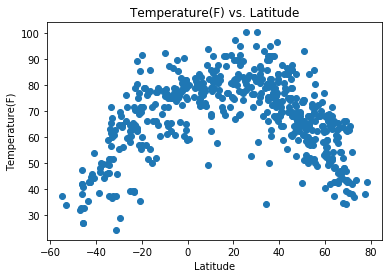

In [20]:

plt.scatter(city_data_pd["Lat"], city_data_pd["Max Temp"])
plt.title("Temperature(F) vs. Latitude")
plt.ylabel("Temperature(F)")
plt.xlabel("Latitude")

Text(0,0.5,'Humidity(%)')

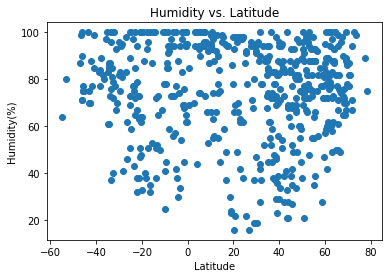

In [21]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Humidity"])
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

Text(0,0.5,'Cloudiness(%)')

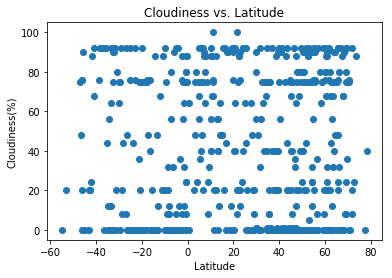

In [22]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Cloudiness"])
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

Text(0,0.5,'Wind Speed(mph)')

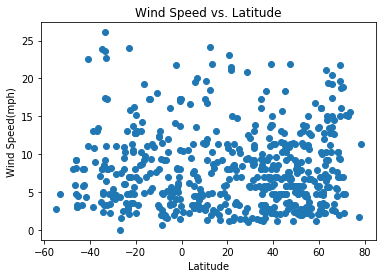

In [23]:
plt.scatter(city_data_pd["Lat"], city_data_pd["Wind Speed"])
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

Weather Data Analysis

The scatter plot of Temperature vs Latitude shows that cities within latitude ranges between -20 and 40 tend to have higher temperatures compared with cities on the opposite ends. 

The Wind Speed vs Latitude scatter plot shows that most of the cities in this sample have wind speeds ranging between 0 and 15 miles per hour. 

A majority of the cities within this sample have between 60% and 100% humidity, according to the Humidity vs Latitude scatter plot. 